# Assignment
Load a pretrained network from TensorFlow Hub, ResNet50 - a 50 layer deep network trained to recognize 1000 objects. 

Apply it to classify the images downloaded below (images from a search for animals in national parks):

## Obtain images

First, retrieve 20 images of animals in national parks

In [16]:
!pip install google_images_download

In [32]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal national park", "limit": 20,
             "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal national park
Evaluating...
Starting Download...
Image URL: https://npca.s3.amazonaws.com/images/8135/2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg?1445969501
Completed Image ====> 1. 2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg
Image URL: https://i.ytimg.com/vi/P8NJa_YoRxk/maxresdefault.jpg
Completed Image ====> 2. maxresdefault.jpg
Image URL: https://greenglobaltravel.com/wp-content/uploads/2017/04/Best-National-Parks-In-USA-For-Wildlife-Watching.jpg
Completed Image ====> 3. best-national-parks-in-usa-for-wildlife-watching.jpg
Image URL: https://www.nps.gov/voya/learn/nature/images/VOYA_web_deer.jpg?maxwidth=1200&maxheight=1200&autorotate=false
Completed Image ====> 4. voya_web_deer.jpg
Image URL: https://npca.s3.amazonaws.com/images/9230/084ac382-5aff-4674-9555-482e5ff07c0b-banner.jpg?1446660999
Completed Image ====> 5. 084ac382-5aff-4674-9555-482e5ff07c0b-banner.jpg
Image URL: https://www.princess.com/images/global/learn/cruise-destinations/

## Pre-process the images

In [0]:
# Imports
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps  # https://pillow.readthedocs.io/en/stable/
import tensorflow as tf
import tensorflow_hub as hub

In [0]:
# Resize all images to 224x224 pixels
image_path_list = absolute_image_paths['animal national park']

def resize_image(filename, new_width=256, new_height=256):
  pil_image = Image.open(filename)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert('RGB')
  pil_image_rgb.save(filename, format='JPEG', quality=90)

for path in image_path_list:
  resize_image(path, 224, 224)

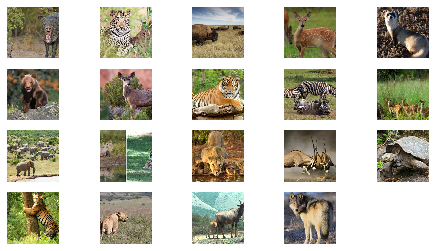

In [63]:
# Show images
def show_images(image_path_list):
  plt.figure();
  for i, image_path in enumerate(image_path_list):
    plt.subplot(5,5, i+1)
    plt.imshow(np.asarray(Image.open(image_path)))
#     plt.title(image_path)
    plt.grid(False)
    plt.yticks([])
    plt.xticks([])
  plt.show()

show_images(image_path_list)

## Make predictions

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def interpret(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  return results


In [78]:
all_predictions = []
for i, image_path in enumerate(image_path_list):
  results = interpret(process_img_path(image_path))
  all_predictions.append(results)
  print(results)

[('n02396427', 'wild_boar', 0.3048278), ('n02114367', 'timber_wolf', 0.26596102), ('n02114712', 'red_wolf', 0.13877252)]
[('n02128385', 'leopard', 0.89813673), ('n02128925', 'jaguar', 0.09981819), ('n02130308', 'cheetah', 0.00082129106)]
[('n02410509', 'bison', 0.9999037), ('n02408429', 'water_buffalo', 5.8510213e-05), ('n02403003', 'ox', 1.5609054e-05)]
[('n02423022', 'gazelle', 0.5517437), ('n02422699', 'impala', 0.3651376), ('n02417914', 'ibex', 0.011949598)]
[('n02443484', 'black-footed_ferret', 0.83207893), ('n02441942', 'weasel', 0.13469873), ('n02447366', 'badger', 0.005009464)]
[('n02132136', 'brown_bear', 0.9834398), ('n02133161', 'American_black_bear', 0.014100538), ('n02134418', 'sloth_bear', 0.0019520944)]
[('n02422699', 'impala', 0.31163555), ('n02415577', 'bighorn', 0.265703), ('n02423022', 'gazelle', 0.2069285)]
[('n02129604', 'tiger', 0.90248567), ('n02123159', 'tiger_cat', 0.09539883), ('n02128925', 'jaguar', 0.0011321513)]
[('n02391049', 'zebra', 0.99980146), ('n01798

wild_boar: 0.305
timber_wolf: 0.266
red_wolf: 0.139


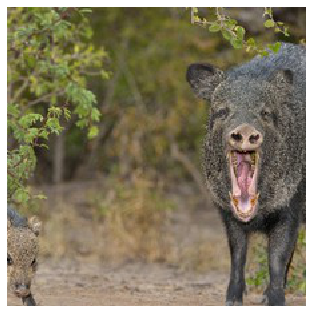


leopard: 0.898
jaguar: 0.100
cheetah: 0.001


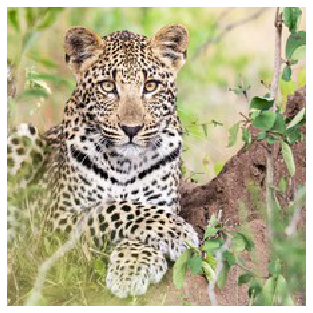


bison: 1.000
water_buffalo: 0.000
ox: 0.000


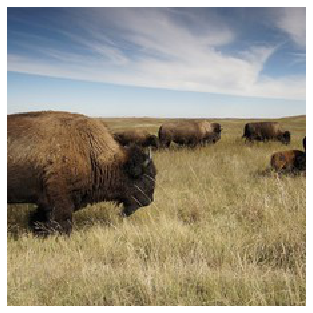


gazelle: 0.552
impala: 0.365
ibex: 0.012


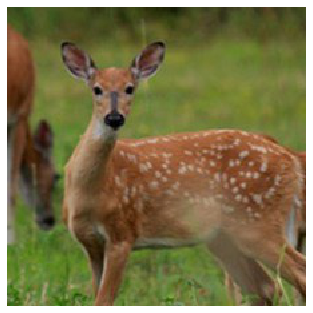


black-footed_ferret: 0.832
weasel: 0.135
badger: 0.005


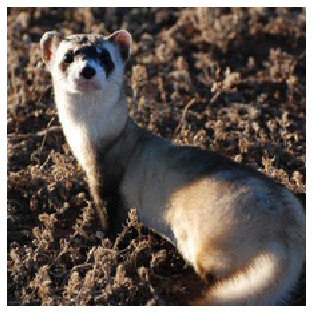


brown_bear: 0.983
American_black_bear: 0.014
sloth_bear: 0.002


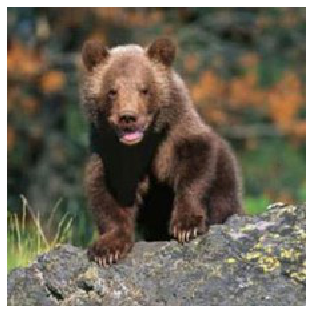


impala: 0.312
bighorn: 0.266
gazelle: 0.207


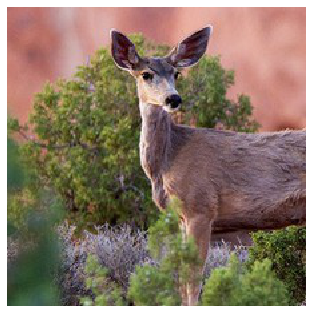


tiger: 0.902
tiger_cat: 0.095
jaguar: 0.001


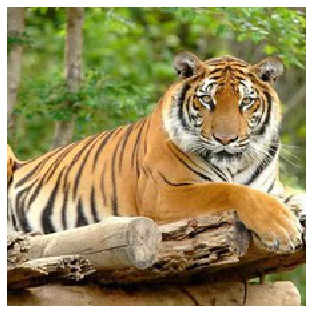


zebra: 1.000
prairie_chicken: 0.000
hartebeest: 0.000


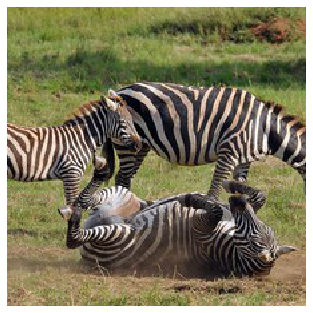


dhole: 0.662
impala: 0.049
kit_fox: 0.038


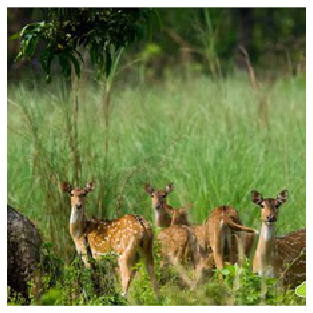


African_elephant: 0.993
Indian_elephant: 0.005
tusker: 0.002


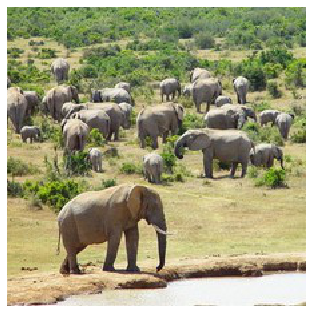


tiger: 0.688
zebra: 0.216
tiger_cat: 0.066


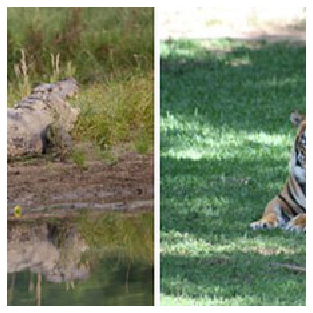


lion: 0.998
cougar: 0.001
dhole: 0.001


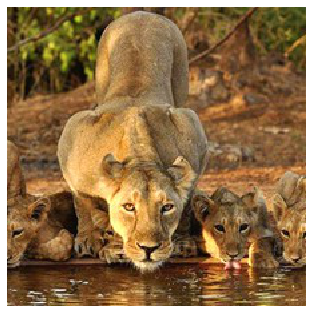


gazelle: 0.949
impala: 0.031
hartebeest: 0.011


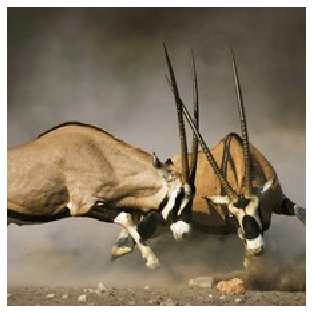


terrapin: 0.695
mud_turtle: 0.264
box_turtle: 0.040


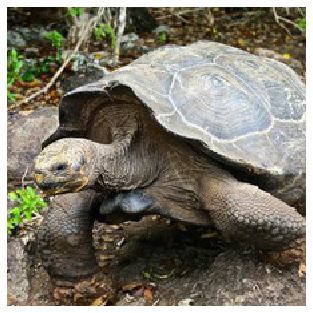


tiger: 0.662
tiger_cat: 0.338
zebra: 0.000


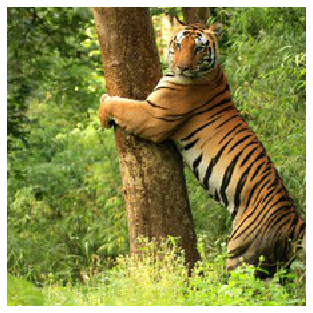


lion: 1.000
hyena: 0.000
cheetah: 0.000


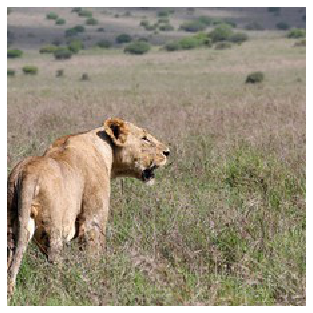


hartebeest: 0.970
ibex: 0.013
gazelle: 0.007


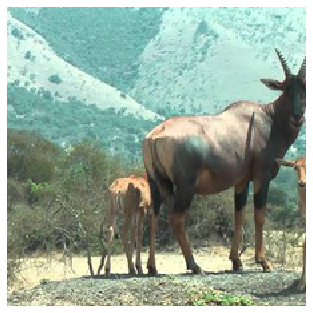


timber_wolf: 0.782
white_wolf: 0.062
red_wolf: 0.058


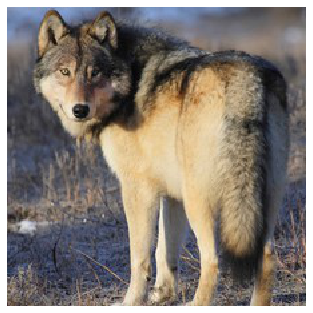

In [83]:
for path, prediction in zip(image_path_list, all_predictions):
  
  for _, animal, prob in prediction:
    print(f'{animal}: {prob:.3f}')

  plt.subplot()
  plt.imshow(np.asarray(Image.open(path)))
  plt.grid(False)
  plt.yticks([])
  plt.xticks([])
  plt.show()
  print()

As you might expect, the system worked best with the most distinctive animals (zebras) and the least well with animals that are easy to confuse (impalas vs gazelles).  It even caught a piece of a tiger in that one strange image that combines a tiger and a crocodile for no clear reason. 